In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR, Lasso
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics


In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature


C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

In [13]:
features = X.columns
features


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.30)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


In [15]:
# Lets apply the Lasso Model -- in Linear Dataset
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [16]:
coeff = lasso.coef_
coeff


array([-1.22854422e-01,  3.86385849e-02, -4.97188385e-04,  1.48353759e+00,
       -0.00000000e+00,  3.89367421e+00, -1.96048179e-02, -1.10561397e+00,
        2.16673479e-01, -1.05844004e-02, -7.44014516e-01,  1.23959059e-02,
       -6.02281637e-01])

In [17]:
df_coeff = pd.DataFrame({"features": features, "coeff": coeff})
df_coeff.sort_values("coeff")


,features,coeff
7,DIS,-1.105614
10,PTRATIO,-0.744015
12,LSTAT,-0.602282
0,CRIM,-0.122854
6,AGE,-0.019605
9,TAX,-0.010584
2,INDUS,-0.000497
4,NOX,-0.000000
11,B,0.012396
1,ZN,0.038639


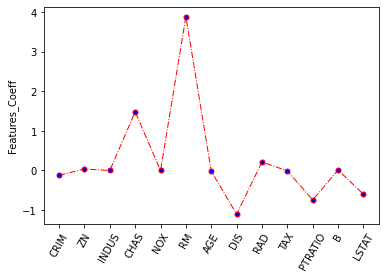

In [18]:
# Lets plot the coeff with features
plt.plot(range(len(features)), coeff, color='red', linestyle='dashdot', linewidth=1, marker='o',
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(features)), features, rotation=60)
plt.ylabel("Features_Coeff")
plt.show()


<AxesSubplot:xlabel='features', ylabel='coeff'>

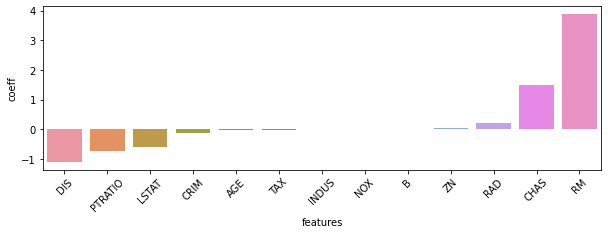

In [19]:
# Use Bar chart to show coeff
df_coeff.set_index('coeff')
# sort in ascending order to better visualization.
df_coeff = df_coeff.sort_values('coeff')
# plot the feature coeff in bars.
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45)
sns.barplot(x="features", y="coeff", data=df_coeff)
